


# *** FINAL PROJECT - Application of methods for data analysis***

###   *part 1- data collection*

**Goal:** collect emails of five different senders.  
**Plan:** we will use Gmail API in order to connect to our gmail and take emails from there.  



## 1.1 Get The Data - Using API

first let's import the relevant packages.  
Brief summary about them:  
*email package* - this package is for managing email messages, we will use the main class from there called email.message in order to create messages objects and get the relevant information from them.  
*imaplib package* - implements a client for communicating with Internet Message Access Protocol, we will use it in order to connect to gmail imap.  
*re package* - regular expression package, we will use it in order to search\remove patterns in the data.
*pandas package* - provided easy to use data structures and data analysis tools, we used data structures with pandas.  
*csv library* - to treat csv files.  
*matplotlib library* - provided easy way to generate plots.
*seaborn library* - for statistical visualization.

In [29]:
import email
import imaplib
import re
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

connect to imap.gmail api using IMAP package, and login by user and passwrd (pwd)

In [30]:
user="shavitcherni91"   #to delete later
pwd="tamirshavit"       #to delete later

mail = imaplib.IMAP4_SSL("imap.gmail.com")
mail.login(user,pwd)

('OK', [b'shavitcherni91@gmail.com authenticated (Success)'])

now, after we are logged in, we can send queries to gmail api by the variable mail we created,  
first we will choose folder "INBOX", because the relevant emails will be there.

In [31]:
mail.select("INBOX")

('OK', [b'147'])

this command will take all the emails in INBOX folder and saves their ids in data.  
result will hold the status for our request. (ok,failed)  

about the command: 'search' is the function we want to do, None indicate the parameters for the function, and the third argument is a filter, "ALL" means take everything. (equivalent to no filter)

In [32]:
result, data= mail.uid('search',None, "ALL")
data

[b'3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149']

data now holds a list with one string member that include all the ids.  
let's split it to list that each member is id:

In [33]:
inbox_item_list = data[0].split() 
inbox_item_list

[b'3',
 b'4',
 b'5',
 b'6',
 b'7',
 b'8',
 b'9',
 b'10',
 b'11',
 b'12',
 b'13',
 b'14',
 b'15',
 b'16',
 b'17',
 b'18',
 b'19',
 b'20',
 b'21',
 b'22',
 b'23',
 b'24',
 b'25',
 b'26',
 b'27',
 b'28',
 b'29',
 b'30',
 b'31',
 b'32',
 b'33',
 b'34',
 b'35',
 b'36',
 b'37',
 b'38',
 b'39',
 b'40',
 b'41',
 b'42',
 b'43',
 b'44',
 b'45',
 b'46',
 b'47',
 b'48',
 b'49',
 b'50',
 b'51',
 b'52',
 b'53',
 b'54',
 b'55',
 b'56',
 b'57',
 b'58',
 b'59',
 b'60',
 b'61',
 b'62',
 b'63',
 b'64',
 b'65',
 b'66',
 b'67',
 b'68',
 b'69',
 b'70',
 b'71',
 b'72',
 b'73',
 b'74',
 b'75',
 b'76',
 b'77',
 b'78',
 b'79',
 b'80',
 b'81',
 b'82',
 b'83',
 b'84',
 b'85',
 b'86',
 b'87',
 b'88',
 b'89',
 b'90',
 b'91',
 b'92',
 b'93',
 b'94',
 b'95',
 b'96',
 b'97',
 b'98',
 b'99',
 b'100',
 b'101',
 b'102',
 b'103',
 b'104',
 b'105',
 b'106',
 b'107',
 b'108',
 b'109',
 b'110',
 b'111',
 b'112',
 b'113',
 b'114',
 b'115',
 b'116',
 b'117',
 b'118',
 b'119',
 b'120',
 b'121',
 b'122',
 b'123',
 b'124',
 b'125

 we want to collect the emails of just five senders:

In [34]:
emailAddresses_list = ["leapeturel@gmail.com","illonashachar78@gmail.com","itaicohen266@gmail.com","dvirnimrod84@gmail.com","asafdavid08@gmail.com"]

let's investigate the FROM field as we can see its include the email address of the sender, but not only... it also include more characters, so we have to extract only the address.  
we will do it inside the loop (in the next snippet).

In [35]:
result2, email_data = mail.uid('fetch', inbox_item_list[0], '(RFC822)')
raw_email = email_data[0][1].decode("ISO-8859-1")  
email_message = email.message_from_string(raw_email) 
print("subject: " + email_message['SUBJECT'])
print("from: " + email_message['FROM'])

subject: try
from: =?UTF-8?B?16nXkdeZ15gg16bXqNeg15nXl9eV15E=?= <shavitcherni91@gmail.com>


this snippet include the main functionality, we fetch each email id in order to get the email data. each data is coded in byte, so we have to decode it to ISO-8859-1 in order to get string. after we have the decoded data, we create message by using message_from_string function in email package. the field "FROM" in email_message as we mentioned include the email address but with some more details like name or other signs we dont need so we are using re package in order to get *only* the email address.  

we save the data in a list container, each member in the list is also a list container with 2 indexes, one for the email address that send the email (FROM) and the other for the message.

In [36]:
lst=[]
for item in inbox_item_list:
    result2, email_data = mail.uid('fetch', item, '(RFC822)')
    raw_email = email_data[0][1].decode("ISO-8859-1")  
    email_message = email.message_from_string(raw_email)
    from_= email_message['FROM']
    m = re.search('[^\s@<>]+@[^\s@<>]+\.[^\s@<>]+',from_).group(0)
    if m in emailAddresses_list:
        lst_member = []
        for part in email_message.walk():
            content_type = part.get_content_type()
            if "plain" in content_type:
                lst_member.append(m)
                lst_member.append(part.get_payload())
            else:
                continue
        lst.append(lst_member)

save the data locally:

In [40]:
title=["email address","message"]
lst.insert(0,title)
with open('./saveData/orginalData.csv','w',newline='') as fp:
    a = csv.writer(fp, delimiter=',')
    a.writerows(lst)

## 1.2 Explore The Data

first, let's take a general look about the data:

In [42]:
lst[1:]

[['illonashachar78@gmail.com',
  ' Hi [image: =F0=9F=99=82] no, I will be free for almost all Day!\r\nShavit I am not going out today but If You would like to go I would\r\nrecomend You club called Rado=C5=9B=C4=87 for tonight!\r\n'],
 ['illonashachar78@gmail.com',
  ' You can go free before 10 pm. At 10 people will start letting a lot of\r\nlanterns in the air and then will be a concert .\r\nPeople just want to beat a record (a lot of lanterns) without any reason.\r\nDo what are Your plans for tomorrow? Are You going to Kazimierz?\r\n'],
 ['illonashachar78@gmail.com', ' What time are You going to Kazimierz?\r\n'],
 ['illonashachar78@gmail.com',
  ' I think it is better for You to go there by bus because my parents will\r\nstart travel around 8.20. IT is to early!\r\nI will check schedul of buses for You now\r\nBus to Kazimierz Dolny 9.25 - You will be in Kazimierz at 10.35 (big bus )\r\nor 10.20 -You will be in Kazimierz at 11.40 (small bus )\r\nThe places where the bus start is : 9.2

as we can see the messages are very dirty, with many irrelevant signs such as images links and emoji codes. in order to draw some conclusions about the data we will first clean all the irrelevant signs.

first, we will remove all the signs of "newLine" (\r\n) we don't need them, because there are no meaning to them in our case.  
second, we will remove all the images (begin with the word Rado,Skarp or [image...]), there is a chance that some of them are emoji, but we can't decide which one is emoji and which one is not, and we don't know the meaning of each image emoji, so we decided to remove them also.
third, we will remove some puctuation signs such as (",-;'), because usually people are not consistent about it.  
fourth, we will remove all the links to sites (such as [.. http...], <http...>).  

for now, we decided to keep all the other signs (such as !,?,.) because we think we may gain information from this signs, we will elaborate later about it.

to do it, we will use re package.


In [43]:
for i in range(0,len(lst)):
            lst[i][1] = lst[i][1].replace("\r\n", " ")
            lst[i][1] = re.sub(r'\[.*?\]|\(.*http.+\)|\<.*http.+\>','',lst[i][1])
            lst[i][1] = re.sub(r'Rado([^\s]+)|Skarp([^\s]+)', '', lst[i][1])
            lst[i][1] = re.sub(r'\=[A-Z|0-9][A-Z|0-9]|\=|[\,\-\;\']', '', lst[i][1])
            lst[i][1] = ' '.join(lst[i][1].split()) # substitute multiply whitespace to one whitespace
lst

[['email address', 'message'],
 ['illonashachar78@gmail.com',
  'Hi no I will be free for almost all Day! Shavit I am not going out today but If You would like to go I would recomend You club called for tonight!'],
 ['illonashachar78@gmail.com',
  'You can go free before 10 pm. At 10 people will start letting a lot of lanterns in the air and then will be a concert . People just want to beat a record (a lot of lanterns) without any reason. Do what are Your plans for tomorrow? Are You going to Kazimierz?'],
 ['illonashachar78@gmail.com', 'What time are You going to Kazimierz?'],
 ['illonashachar78@gmail.com',
  'I think it is better for You to go there by bus because my parents will start travel around 8.20. IT is to early! I will check schedul of buses for You now Bus to Kazimierz Dolny 9.25 You will be in Kazimierz at 10.35 (big bus ) or 10.20 You will be in Kazimierz at 11.40 (small bus ) The places where the bus start is : 9.25 : ul. Ruska 7/pod 10. 20: ul. Ruska Both are behind bus 

## 1.3 Save The Data

save the data as csv file:  
(we could do it by panda by let's try another way, nad open this file and make some statistics using panda)

In [12]:
title=["email address","message"]
lst.insert(0,title)
with open('./saveData/dataNew.csv','w',newline='') as fp:
    a = csv.writer(fp, delimiter=',')
    a.writerows(lst)

## 1.4 Explore The Data

let's read the csv file we wrote, and saves is as dataframe using panda package, later we will try to get some statistics about our data.

In [13]:
df = pd.read_csv("dataNew.csv")
df

,email address,message
0,email address,message
1,illonashachar78@gmail.com,"Hi [image: =F0=9F=99=82] no, I will be free f..."
2,illonashachar78@gmail.com,You can go free before 10 pm. At 10 people wi...
3,illonashachar78@gmail.com,What time are You going to Kazimierz?\r\n
4,illonashachar78@gmail.com,I think it is better for You to go there by b...
5,illonashachar78@gmail.com,Go to Riviera! [image: =F0=9F=99=82]\r\nI sho...
6,dvirnimrod84@gmail.com,"I'm not even sure I have depression, I think t..."
7,dvirnimrod84@gmail.com,"What a fantastic answer, but also a really bad..."
8,dvirnimrod84@gmail.com,I had a few people on her write to me over Xma...
9,dvirnimrod84@gmail.com,"Quick research, scan read. Told you I would......"


it will be more comfortable to read the table if it will be sorted, so first we will sort it by email address.

In [469]:
df = (df.sort_values('email address')).reset_index(drop=True)
df


,email address,message
0,asafdavid08@gmail.com,Netflix. Hulu. Amazon Prime. HBO Go. Showtime....
1,asafdavid08@gmail.com,So I may be in the minority but Im buying this...
2,asafdavid08@gmail.com,Currently I have the 42mm Aluminum Sport model...
3,asafdavid08@gmail.com,My heart wants to believe that all hype around...
4,asafdavid08@gmail.com,I just want an open discussion about this topi...
5,asafdavid08@gmail.com,So far Im enjoying the beta on my iPad Pro 9.7...
6,asafdavid08@gmail.com,So how many of you are getting destroyed in th...
7,asafdavid08@gmail.com,So it appears that maybe were headed toward a ...
8,asafdavid08@gmail.com,The best way to retain customers in a product ...
9,asafdavid08@gmail.com,So as many of you know I love my Switch. First...


In [470]:
df.shape

(141, 2)

now, we can investigate our data more easily. first, we can notice that the df consists of 141 rows, each row is a message so there are 141 messages in total.    
let's use panda to derive more features and knowledge from that data we have.   
first, we want to know how many messages we have from each type:

In [471]:
pd.DataFrame({'count' : df.groupby('email address').size()}).reset_index()

,email address,count
0,asafdavid08@gmail.com,31
1,dvirnimrod84@gmail.com,27
2,illonashachar78@gmail.com,29
3,itaicohen266@gmail.com,26
4,leapeturel@gmail.com,28


as we can see asafdavid08@gmail.com the maximun amount of messages, and itaicohen266@gmail.com has the minimum.

we can add to the df one more column that will show the length of words of each message:  
(with this information we can deduce more intersting information about the messages.)

In [472]:
df['message length'] = df.message.apply(lambda row: len(row.split(' ')))
df

,email address,message,message length
0,asafdavid08@gmail.com,Netflix. Hulu. Amazon Prime. HBO Go. Showtime....,142
1,asafdavid08@gmail.com,So I may be in the minority but Im buying this...,72
2,asafdavid08@gmail.com,Currently I have the 42mm Aluminum Sport model...,81
3,asafdavid08@gmail.com,My heart wants to believe that all hype around...,220
4,asafdavid08@gmail.com,I just want an open discussion about this topi...,99
5,asafdavid08@gmail.com,So far Im enjoying the beta on my iPad Pro 9.7...,106
6,asafdavid08@gmail.com,So how many of you are getting destroyed in th...,68
7,asafdavid08@gmail.com,So it appears that maybe were headed toward a ...,259
8,asafdavid08@gmail.com,The best way to retain customers in a product ...,71
9,asafdavid08@gmail.com,So as many of you know I love my Switch. First...,77


let's get deeper to explore more details about our data, and find the average and sum length of message for each one of the senders:

In [473]:
df_summary = df.groupby('email address').agg({'message length':['mean','sum']}).reset_index()
df_summary.columns = ['Email_address', 'Mean','Sum']
df_summary

,Email_address,Mean,Sum
0,asafdavid08@gmail.com,163.935484,5082
1,dvirnimrod84@gmail.com,405.814815,10957
2,illonashachar78@gmail.com,53.275862,1545
3,itaicohen266@gmail.com,127.692308,3320
4,leapeturel@gmail.com,53.392857,1495


we can notice, that illona and lea messages are very short, around 53 words per message, and the total words of all messages are around 1500. on the other side dvir's messages are very long, around 405 words per message.

it will be easier to undertstand the results by plotting it to a graph:  
(in the first graph, we made intervals of 500 to y axis, so it will be more readable)

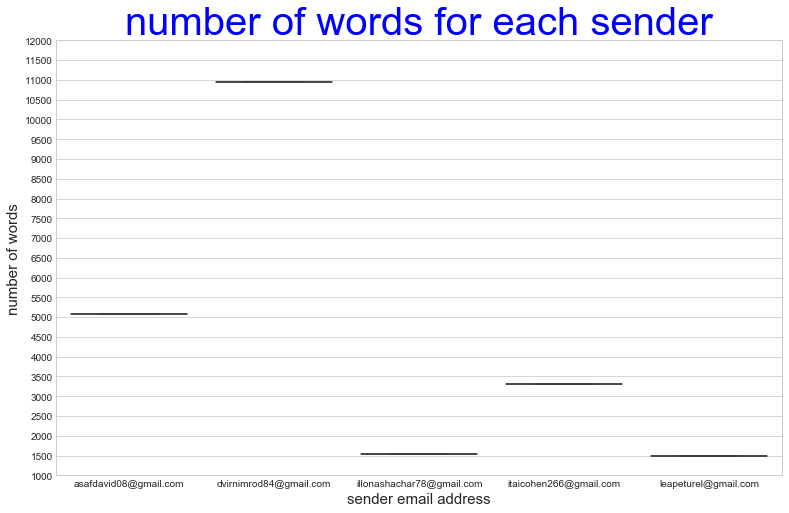

In [474]:
res, ax = plt.subplots(figsize=(13,8))
fig = sns.boxplot(x="Email_address", y="Sum", data=df_summary, ax=ax)
lst=[]
x=1000
while x<=12000:
    lst.append(x)
    x=x+500
plt.yticks(lst)
fig.set_title("number of words for each sender",size=40, color='blue')
fig.set_xlabel('sender email address', fontsize=15) 
fig.set_ylabel('number of words', fontsize=15) 
plt.show()


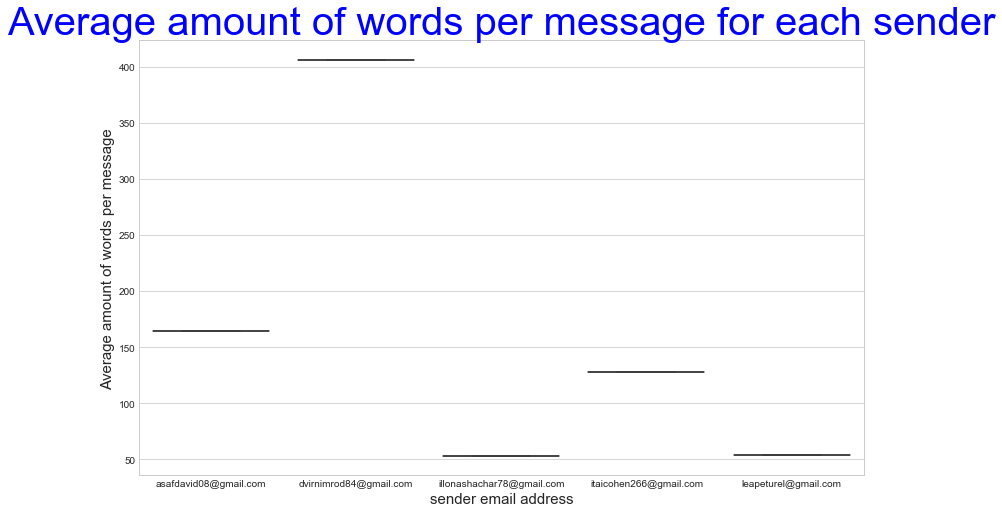

In [475]:
res, ax = plt.subplots(figsize=(13,8))
fig = sns.boxplot(x="Email_address", y="Mean", data=df_summary, ax=ax)
fig.set_title("Average amount of words per message for each sender",size=40, color='blue')
fig.set_xlabel('sender email address', fontsize=15) 
fig.set_ylabel('Average amount of words per message', fontsize=15) 
plt.show()

by this plot, we can understand that probably it will be more difficult to make new messages for illona and lea because the number of words is lower. we can also understand that the messages we have to produce for them will be short (around 60 words), and because of this reason maybe we can handle with the low amount of total words we have.  
at the next parts we will examine it.

(other statistics like pairplot and scatter are not useful for us, because it help to find correlation between variables, and we don't have so many variables right now, only sum and mean that the correlation between them is clear.)

### PART1 -CONCLUSION

* we collect data- gmail messages from 5 different senders by using gmail API.
* we clean the data using re package.
* we store the data in a list container, and saved it as a csv file.
* we load the csv file to DataFrame using pandas package.
* we explore the data (number of messages of each type, amount and average number of words per message), and plot the result by table and by graph.



*relevant information we used from the internet:*

using IMAP with gmail tutorial: https://yuji.wordpress.com/2011/06/22/python-imaplib-imap-example-with-gmail/  
phyton docs: https://docs.python.org   
building regular expressions: https://regexr.com/  
and lectures material.